In [12]:
import matplotlib.pyplot as plt
import numpy as np

# A Python implementation for Residual Sur(Realism)

The goal of here is very simple.
Given an image, we want to process the image to generate a set of data so that by applying linear regression on the data set, we can reproduce the image by ploting the residuals against predicted values.

For more detailed information, follow the [link](http://www4.stat.ncsu.edu/~stefanski/NSF_Supported/Hidden_Images/stat_res_plots.html#Download_Data_Sets) and read [the paper](http://www4.stat.ncsu.edu/~stefanski/NSF_Supported/Hidden_Images/Residual_Surrealism_TAS_2007.pdf). 

There is an implementation in R on the web page mentioned above.
This repo contains a Python 2.7 implementation.
The implementation here is based on the original paper.

All the useful methods and class are in `residuals.py`.

Dependencies:

* numpy
* sklearn
* matplotlib
* PIL


# Plot the residuals vs predicted values

Here we demostrate how to plot the residuals vs predicted values plot with a given data set.

We are going to need the `residuals.calculateResidualsFromFile()` function from `residuals.py`.
So we import `residuals.py` first.

In [1]:
import residuals

Getting the residuals and predicted values is very simple.
We just need to give `residuals.calculateResidualsFromFile()` the path to the data set.
We have an example data set called `gauss_data.txt` in the repo, which will show a portrait of Gauss if treated correctly.

In [5]:
gauss_predicted, gauss_residuals = residuals.calculateResidualsFromFile("./gauss_data.txt")

Then we just need to do a scatter plot of the residuals vs the predicted values

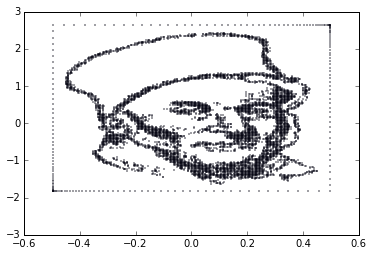

In [7]:
scatter(gauss_predicted, gauss_residuals, s=0.2)

Later we can use this function to see if we are genrating the right data set.

# Generate the image

In order to generate a data set, we first need to generate an image.
Unfortunately this can not be achieved by using Python.

Theoretically, the image can be anything you want.
But due to the resulotion restriction of scatter plot, simpler images lead to better final results.
`FA2017ADS.jpg` in the repo is a very good example of simple yet clear image.

# Processing the image 

Before generating the data, we need to precess the image to get the coordinates of the wanted dots.
The `residuals.ImageProcessor` class can help us acheive this by going through the following steps:

* Convert the image to grayscale
* Extract the coordinates of the dark pixles and renormalize the coordinates
* Add a frame so the coordinates are orthogonal

For the theory behind all these steps, please read the original paper.

We will use `FA2017ADS.jpg` as an example to show you how to do this.
First we import the PIL lib.

In [8]:
from PIL import Image

Open the image we want to process with PIL and feed the image to `residuals.ImageProcessor`.

In [9]:
FA2017ADS_image = Image.open("./FA2017ADS.jpg")
FA2017ADS_image_processor = residuals.ImageProcessor(FA2017ADS_image)

Then we need to add a frame to the image:

In [10]:
FA2017ADS_image_processor.addFrame()

The coordinates of the dark pixles can be accessed as follows:

In [15]:
FA2017ADS_predicted, FA2017ADS_residuals = FA2017ADS_image_processor.final_xs, FA2017ADS_image_processor.final_ys

By doing the scatter plot, we can see the results are indeed what we want.

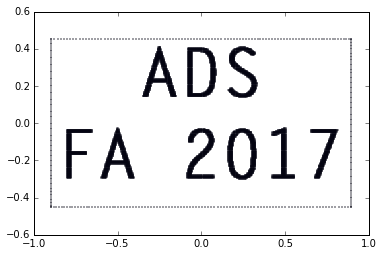

In [16]:
plt.scatter(FA2017ADS_predicted, FA2017ADS_residuals, s=0.2)

# Generate the data set

Now that we have the coordinates of the dark pixels, we can use `residuals.DataGenerator` to generate the data set.
The following code show how to generate the data set with 4 features and save the results to a .txt file.

Please read the orignal paper for the theory behind and the meaning of the paramter 

In [20]:
FA2017ADS_dat_generator = residuals.DataGenerator(FA2017ADS_predicted, FA2017ADS_residuals, 0.75, FA2017ADS_predicted.shape[0], 4, 4, 0)
# generate the features and target
FA2017ADS_dat_generator.generateData()
# save the data into file
# the first column is the target and the rest are features
FA2017ADS_dat_generator.dumpData("FA2017GeneratedData.txt")

Round 0, delta: 3.94E-03
Round 1, delta: 4.85E-05
Round 2, delta: 6.08E-07
Round 3, delta: 7.58E-09
Round 4, delta: 9.44E-11
Round 5, delta: 1.18E-12
Round 6, delta: 1.47E-14


To ensure the data set is correct, we can apply linear regression to it and see the result.

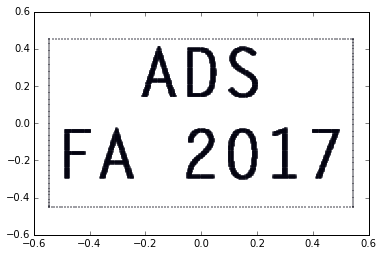

In [21]:
FA2017ADS_predicted_test, FA2017ADS_residuals_test = residuals.calculateResidualsFromFile("./FA2017GeneratedData.txt")
plt.scatter(FA2017ADS_predicted_test, FA2017ADS_residuals, s=0.2)